In [40]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from adjustText import adjust_text

In [2]:
df = load_dataset("lukebarousse/data_jobs")['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [16]:
df_US_DA = df[(df['job_country'] == "United States") & (df['job_title_short'] == 'Data Analyst')].copy()
df_US_DA['job_posted_month'] = df_US_DA['job_posted_date'].dt.month
df_US_explode_skills = df_US_DA.explode("job_skills").copy()
df_US_pivot = pd.pivot_table(df_US_explode_skills, index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_US_pivot.loc['Total'] = df_US_pivot.sum()
df_US_pivot = df_US_pivot[df_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_US_pivot.drop('Total', inplace=True)
df_US_pivot


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_DA_US_total = df_US_DA.groupby('job_posted_month').size()
df_DA_US_percent = df_US_pivot.div(df_DA_US_total/100, axis=0)
df_DA_US_final = df_DA_US_percent.iloc[:,:5].copy()
df_DA_US_final

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166
2,51.730895,42.243632,27.367734,26.420640,19.790986
3,51.881634,42.795111,29.012544,27.066581,19.909939
4,53.231939,42.139197,29.575136,27.756654,21.524219
5,51.692369,42.419387,28.680152,27.017825,19.467254
6,50.360725,41.914482,28.646841,28.312511,17.314799
7,50.163430,40.722938,29.475101,27.648529,19.150163
8,51.462165,41.166717,29.409105,30.524570,19.234248
9,49.471869,38.823022,29.165768,26.492779,18.452253


In [33]:
df_DA_US_final.reset_index(inplace=True)
df_DA_US_final['job_posted_month'] = pd.to_datetime(df_DA_US_final['job_posted_month'], format='%m').dt.strftime('%b')
df_DA_US_final.set_index('job_posted_month', inplace=True)
df_DA_US_final

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


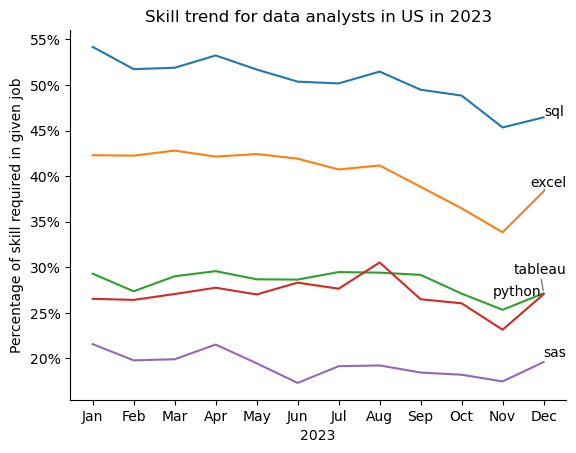

In [ ]:

from matplotlib.ticker import PercentFormatter
sns.lineplot(df_DA_US_final, dashes=False)
plt.legend().set_visible(False)
sns.despine()
texts = []
for i in range(5):
    texts.append(
        plt.text(11, df_DA_US_final.iloc[-1, i], df_DA_US_final.columns[i])
    )
plt.title('Skill trend for data analysts in US in 2023')
plt.xlabel('2023')
plt.ylabel('Percentage of skill required in given job')
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()